In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [42]:
data = pd.read_csv("C:/Users/MY PC/Desktop/Mall_Customers.csv")

In [43]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [47]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [46]:
data.shape

(200, 5)

In [45]:
data.info() # no null object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
data.columns

Index(['Annual Income (k$)'], dtype='object')

In [49]:
data.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income','Spending_Score']

In [50]:
data = data[['Annual_Income','Spending_Score']]

In [51]:
from sklearn.cluster import KMeans

In [53]:
# finding k value by elbow method
wcss = []

In [55]:
for i in range(1,10):
    kmeans = KMeans(n_clusters= i,init="k-means++")
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

In [56]:
wcss

[269981.28000000003,
 181363.59595959596,
 106348.37306211118,
 73679.789039488343,
 44448.455447933709,
 37455.984555160285,
 30241.343617936589,
 25095.703209997548,
 21809.927562615183]

In [58]:
plt.plot(range(1,10),wcss)

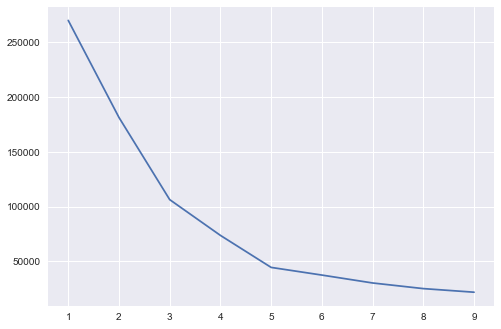

In [60]:
plt.show()


In [61]:
# it means our number of clusters are 5

In [62]:
# Building the model

model = KMeans(n_clusters=5,init="k-means++",random_state=0)
y = model.fit_predict(data)

In [63]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2])

In [68]:
data['cluster'] = y
data.tail()


,Annual_Income,Spending_Score,cluster
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0
199,137,83,2


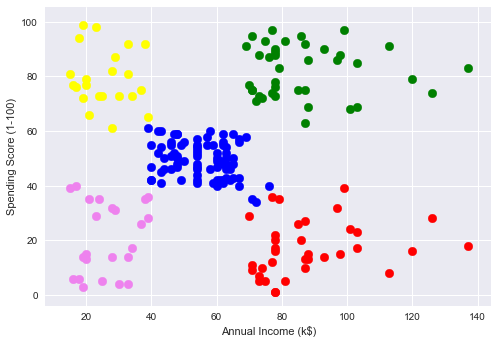

In [75]:
plt.scatter(data['Annual_Income'][data.cluster == 0] , data['Spending_Score'][data.cluster == 0], s = 75, c = 'red')
plt.scatter(data['Annual_Income'][data.cluster == 1] , data['Spending_Score'][data.cluster == 1], s = 75, c = 'blue')
plt.scatter(data['Annual_Income'][data.cluster == 2] , data['Spending_Score'][data.cluster == 2], s = 75, c = 'green')
plt.scatter(data['Annual_Income'][data.cluster == 3] , data['Spending_Score'][data.cluster == 3], s = 75, c = 'yellow')
plt.scatter(data['Annual_Income'][data.cluster == 4] , data['Spending_Score'][data.cluster == 4], s = 75, c = 'violet')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [76]:
# So this company can dedicate the time to the customers in green cluster as their earning is high and also spending is also high